In [4]:
import numpy as np 
import pandas as pd
import os 
import librosa 
import wave 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizer_v1 import rmsprop
print("Libraries loaded")


Libraries loaded


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
def extract_mfcc(wav_file_name):

    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [8]:

radvess_speech_labels = [] 
ravdess_speech_data = [] 
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio'):
    for filename in filenames:
     
        radvess_speech_labels.append(int(filename[7:8]) - 1) 
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name)) 
        
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [9]:
ravdess_speech_data

[array([-5.3944464e+02,  5.0090363e+01, -9.4126539e+00,  7.3318172e+00,
        -1.5387509e+00, -2.9151354e+00, -1.0203468e+01, -9.2197104e+00,
        -1.7610708e+01, -6.7406974e+00, -2.1607699e+00, -6.6235013e+00,
        -6.6119111e-01, -2.4312370e+00, -8.1284571e+00,  5.0682199e-01,
        -8.9425936e+00, -5.2996378e+00, -2.9624281e+00, -2.8136215e+00,
        -8.2755518e+00, -2.4930682e+00, -4.5553684e+00, -6.1407404e+00,
        -4.6559787e+00, -1.5189031e+00, -7.0572295e+00, -1.7564826e+00,
        -4.4334331e+00, -2.8198695e+00, -3.0981948e+00, -1.7706331e+00,
        -3.0989265e+00,  1.5658832e+00, -6.5434963e-01,  3.7664170e+00,
         1.3068552e+00,  1.4008725e+00,  5.7119465e-01,  2.2770588e+00],
       dtype=float32),
 array([-6.9809332e+02,  6.7791786e+01, -9.0085703e-01,  1.2336590e+01,
         6.4498587e+00,  1.0203948e+00, -4.9938312e+00, -5.5840025e+00,
        -8.3694811e+00, -4.4414024e+00,  2.2507393e+00, -1.0461273e+00,
        -1.5184060e+00, -4.2768407e+00, 

In [10]:

ravdess_speech_data_array = np.asarray(ravdess_speech_data)
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape 

labels_categorical = to_categorical(ravdess_speech_label_array) 
labels_categorical.shape

(2880, 8)

In [11]:
ravdess_speech_data_array.shape

(2880, 40)

In [12]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [13]:

number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [14]:

def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [15]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [16]:
w.shape

(2304, 40, 1)

In [17]:
### train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=121, shuffle=True)

Epoch 1/121
72/72 [==============================] - 7s 57ms/step - loss: 2.0668 - accuracy: 0.1532 - val_loss: 2.0362 - val_accuracy: 0.2014
Epoch 2/121
72/72 [==============================] - 3s 42ms/step - loss: 2.0262 - accuracy: 0.1806 - val_loss: 1.9751 - val_accuracy: 0.2396
Epoch 3/121
72/72 [==============================] - 3s 41ms/step - loss: 1.9807 - accuracy: 0.2079 - val_loss: 1.9370 - val_accuracy: 0.2535
Epoch 4/121
72/72 [==============================] - 3s 40ms/step - loss: 1.9416 - accuracy: 0.2305 - val_loss: 1.8838 - val_accuracy: 0.2847
Epoch 5/121
72/72 [==============================] - 3s 41ms/step - loss: 1.9237 - accuracy: 0.2374 - val_loss: 1.8718 - val_accuracy: 0.2500
Epoch 6/121
72/72 [==============================] - 3s 41ms/step - loss: 1.8869 - accuracy: 0.2604 - val_loss: 1.8327 - val_accuracy: 0.2812
Epoch 7/121
72/72 [==============================] - 3s 41ms/step - loss: 1.8628 - accuracy: 0.2847 - val_loss: 1.7956 - val_accuracy: 0.3125
Epoch 

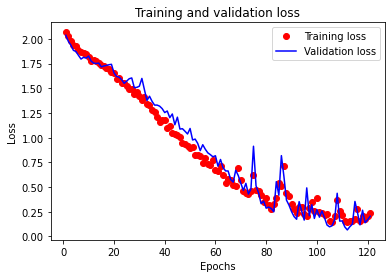

In [18]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

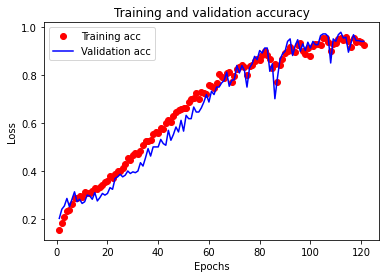

In [19]:

plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:

model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 16ms/step - loss: 0.3108 - accuracy: 0.8889


[0.31082600355148315, 0.8888888955116272]

In [21]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [22]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_11/03-01-01-01-01-01-11.wav')

neutral


In [24]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_14/03-01-05-02-01-01-14.wav')

angry


In [29]:
model_A.save('mymodel.h5')

In [28]:
modelc=tf.keras.models.load_model('mymodel.h5')